<a href="https://colab.research.google.com/github/LailaBulh/Programacion---Claas-Files/blob/main/Practica28_263166_ReduccionNumerosidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ==========================================================================
# 📝 Tarea: Reducción de la Numerosidad con CNN, ENN y K-medias usando SVM
# 📊 Dataset: Breast Cancer (Scikit-Learn)
# 👤 Autor/a: Laila Montserrat Bulhosen Ramos
# 📅 Fecha: 18/11/2025
# ==========================================================================

## 🔍 Descripción:
En este cuaderno aplicarás técnicas de reducción de la numerosidad (CNN, ENN, K-medias) al conjunto de datos Breast Cancer y analizarás su efecto en el rendimiento de un modelo SVM.

## ==========================================================================

## 1. Cargar librerías necesarias
Escribe aquí la importación de librerías: numpy, pandas, matplotlib, seaborn, sklearn (datasets, model_selection, preprocessing, metrics, svm, kmeans), etc.

En el caso de los códigos de ENN, CNN, estos  deberás tomarlos del cuaderno que contiene la teoría y ejemplos.

In [ ]:
#1. Cargar librerías necesarias

In [30]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [16]:
### Carga de dataset
dataset = load_breast_cancer()

#dataset

In [21]:
 ### Conversion a pandas dataframe
 data = pd.DataFrame(dataset.data, columns=[dataset.feature_names])
 print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (mean radius,)              569 non-null    float64
 1   (mean texture,)             569 non-null    float64
 2   (mean perimeter,)           569 non-null    float64
 3   (mean area,)                569 non-null    float64
 4   (mean smoothness,)          569 non-null    float64
 5   (mean compactness,)         569 non-null    float64
 6   (mean concavity,)           569 non-null    float64
 7   (mean concave points,)      569 non-null    float64
 8   (mean symmetry,)            569 non-null    float64
 9   (mean fractal dimension,)   569 non-null    float64
 10  (radius error,)             569 non-null    float64
 11  (texture error,)            569 non-null    float64
 12  (perimeter error,)          569 non-null    float64
 13  (area error,)               569 non

# --------------------------------------------------------------------------

## 2. Cargar y explorar el conjunto de datos Breast Cancer


In [7]:
#2. Cargar y explorar el conjunto de datos Breast Cancer


In [19]:
### Explorar dimensiones

print('La dimension del dataset es: ', dataset.data.shape)


print('\nLas columnas son: ', dataset.keys())

La dimension del dataset es:  (569, 30)

Las columnas son:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [22]:
### Distribucion de clases

X, y = dataset.data, dataset.target

unique, counts = np.unique(y, return_counts= True)
distribucion = dict(zip(dataset.target_names, counts))

print(f'La distribución de cada clase es: {distribucion}')

La distribución de cada clase es: {np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


# --------------------------------------------------------------------------

## 3. Preprocesamiento



 - Escalamiento de características (StandardScaler)
 - División del conjunto en entrenamiento y prueba usar hold-out de 70% y 30%


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [39]:
### Conjunto de datos
X, y = dataset.data, dataset.target

### Division de conjunto 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


### Escalamiento con StandardScaler
scaler = StandardScaler()

# Ajustar solo con datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar también el conjunto de prueba (usando el mismo scaler)
X_test_scaled = scaler.transform(X_test)

# --------------------------------------------------------------------------

## 4. Aplicar técnica CNN (Condensed Nearest Neighbor)



- Aplicar CNN sobre el conjunto de entrenamiento
- Mostrar el tamaño del conjunto reducido



In [31]:
from sklearn.utils.validation import check_X_y
from sklearn.neighbors import KNeighborsClassifier


In [32]:
#4. Aplicar técnica CNN (Condensed Nearest Neighbor)

class CNN:

    def __init__(self, n_neighbors=1):
        self.n_neighbors = n_neighbors
        self.classifier = KNeighborsClassifier(n_neighbors=self.n_neighbors)
        self.sample_indices_ = []

    def select_data(self, X, y):
        # Validación de entrada: datos densos
        X, y = check_X_y(X, y, accept_sparse=False)

        idx_s = []  # índice de instancias seleccionadas
        classes = np.unique(y)
        self.classes_ = classes

        # Iniciar con una instancia aleatoria por clase
        for cur_class in classes:
            mask = np.where(y == cur_class)[0]
            choose_id = random.choice(mask)
            idx_s.append(choose_id)

        # Revisión aleatoria del resto de las instancias
        train_idx = list(range(len(y)))
        random.shuffle(train_idx)

        flag = True
        while flag:
            flag = False
            self.classifier.fit(X[idx_s], y[idx_s])
            for idx in train_idx:
                if idx not in idx_s:
                    x_i = X[idx].reshape(1, -1)
                    if self.classifier.predict(x_i) != [y[idx]]:
                        idx_s.append(idx)
                        self.classifier.fit(X[idx_s], y[idx_s])
                        flag = True

        self.X_ = X[idx_s]
        self.y_ = y[idx_s]
        self.sample_indices_ = sorted(idx_s)
        self.reduction_ = 1.0 - len(self.y_) / len(y)
        return self.X_, self.y_

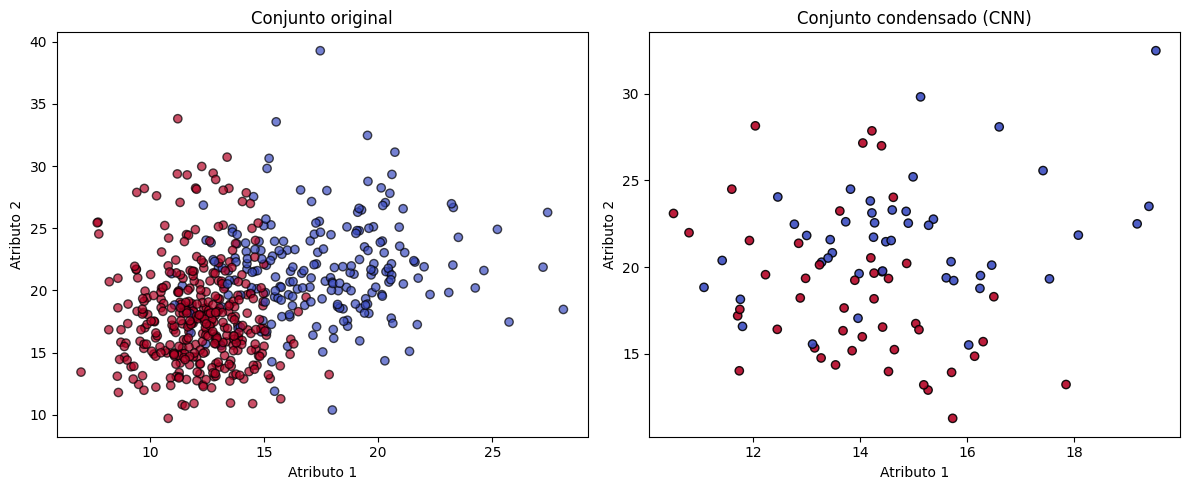

Instancias originales: 569
Instancias tras CNN:   90
Reducción: 84.18%


In [33]:
# Aplicar CNN
cnn = CNN(n_neighbors=1)
X_cnn, y_cnn = cnn.select_data(X, y)

# Visualización
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title("Conjunto original")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")

plt.subplot(1, 2, 2)
plt.scatter(X_cnn[:, 0], X_cnn[:, 1], c=y_cnn, cmap='coolwarm', edgecolor='k', alpha=0.9)
plt.title("Conjunto condensado (CNN)")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")

plt.tight_layout()
plt.show()

print(f"Instancias originales: {len(y)}")
print(f"Instancias tras CNN:   {len(y_cnn)}")
print(f"Reducción: {100 * cnn.reduction_:.2f}%")

 --------------------------------------------------------------------------

## 5. Aplicar técnica ENN (Edited Nearest Neighbor)

- Aplicar ENN sobre el conjunto de entrenamiento
- Mostrar el tamaño del conjunto reducido



In [41]:
from sklearn.utils.validation import check_X_y
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification



In [42]:
# 5. Aplicar técnica ENN (Edited Nearest Neighbor)

class ENN:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors
        self.classifier = KNeighborsClassifier(n_neighbors=self.n_neighbors)
        self.sample_indices_ = []

    def fit(self, X, y):
        # Validación inicial
        X, y = check_X_y(X, y, accept_sparse=False)

        mask = np.ones(len(y), dtype=bool)
        tmp_m = np.ones(len(y), dtype=bool)

        indices = list(range(len(y)))
        random.shuffle(indices)

        for i in indices:
            tmp_m[i] = False
            self.classifier.fit(X[tmp_m], y[tmp_m])
            x_i = X[i].reshape(1, -1)
            y_pred = self.classifier.predict(x_i)
            if y_pred[0] != y[i]:
                mask[i] = False
            tmp_m[i] = True

        self.X_ = X[mask]
        self.y_ = y[mask]
        self.sample_indices_ = np.where(mask)[0]
        self.reduction_ = 1 - len(self.y_) / len(y)
        return self

Original: 569 muestras
Limpio:   531 muestras


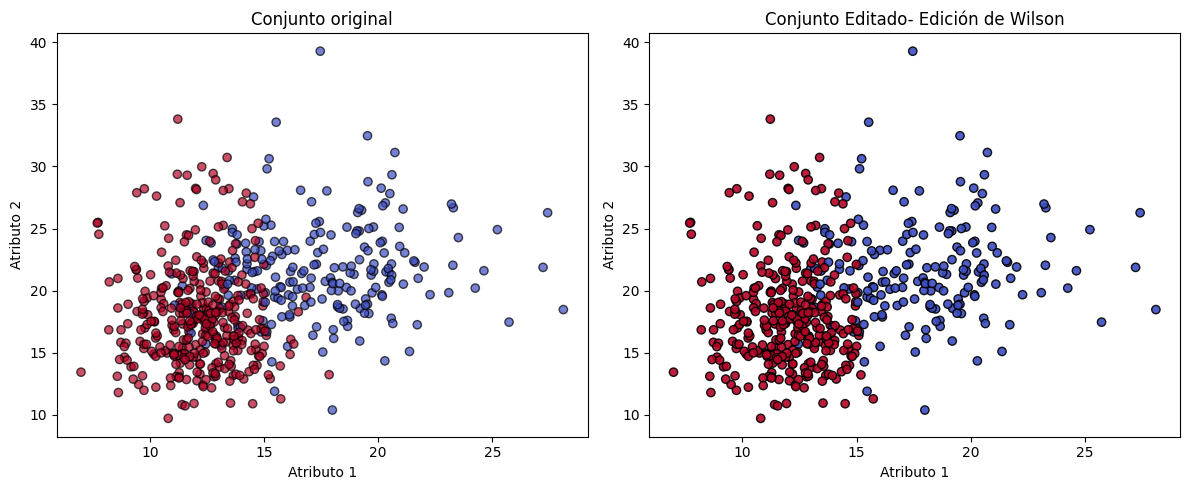

In [43]:

# Aplicar ENN
selector = ENN(n_neighbors=5)
selector.fit(X, y)

# Seleccionar subconjunto
idx = selector.sample_indices_
X_clean, y_clean = X[idx], y[idx]

print(f"Original: {len(y)} muestras")
print(f"Limpio:   {len(y_clean)} muestras")


# Visualización
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title("Conjunto original")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")

plt.subplot(1, 2, 2)
plt.scatter(X_clean[:, 0], X_clean[:, 1], c=y_clean, cmap='coolwarm', edgecolor='k', alpha=0.9)
plt.title("Conjunto Editado- Edición de Wilson")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")

plt.tight_layout()
plt.show()



# --------------------------------------------------------------------------

## 6. Aplicar reducción mediante K-medias
- Realizar agrupamiento por clase y representar cada grupo con su centroide. Elige la mitad de los elementos de cada clase como el valor del número de centroides
- Generar un nuevo conjunto reducido con los centroides como prototipos



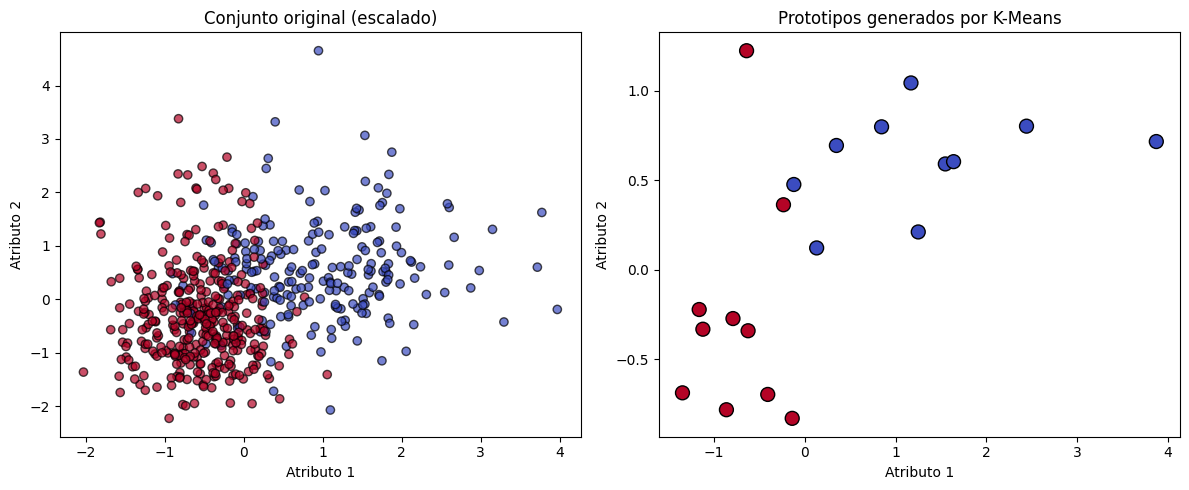

In [34]:
# 6. Aplicar reducción mediante K-medias


## Escalar los datos para mejor desempeño de KMeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Número de prototipos por clase
prototypes_per_class = 10
classes = np.unique(y)

# 4. Aplicar KMeans por clase
prototypes = []
labels = []

for c in classes:
    # Subconjunto de la clase actual
    class_data = X_scaled[y == c]

    # KMeans sobre los datos de la clase
    kmeans = KMeans(n_clusters=prototypes_per_class, random_state=42)
    kmeans.fit(class_data)

    # Guardar prototipos y sus etiquetas
    prototypes.append(kmeans.cluster_centers_)
    labels.extend([c] * prototypes_per_class)

# 5. Concatenar resultados
X_proto = np.vstack(prototypes)
y_proto = np.array(labels)

# 6. Visualización
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Conjunto original
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
axes[0].set_title("Conjunto original (escalado)")
axes[0].set_xlabel("Atributo 1")
axes[0].set_ylabel("Atributo 2")

# Prototipos generados
axes[1].scatter(X_proto[:, 0], X_proto[:, 1], c=y_proto, cmap='coolwarm', edgecolor='k', s=100)
axes[1].set_title("Prototipos generados por K-Means")
axes[1].set_xlabel("Atributo 1")
axes[1].set_ylabel("Atributo 2")

plt.tight_layout()
plt.show()


 --------------------------------------------------------------------------

##7. Entrenar SVM sobre cada conjunto reducido
- Entrenar un modelo SVM (SVC) sobre:
 * los datos originales
 * datos reducidos con CNN
 * datos reducidos con ENN
 * datos reducidos con K-medias
- Evaluar cada modelo con accuracy, F1-score



In [ ]:
#7. Entrenar SVM sobre cada conjunto reducido

# --------------------------------------------------------------------------

## 📊 8. Comparar los resultados y reflexión final
- Comparar las métricas de rendimiento obtenidas con cada técnica
- Escribe tus conclusiones sobre el impacto de la reducción de la numerosidad
- ¿Cuál técnica funcionó mejor? ¿Qué ventajas y desventajas observaste?

